In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diamonds = pd.read_csv('data/diamonds_train.csv')

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


In [6]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


In [7]:
diamonds['price'].max()

18823

In [8]:
diamonds['price'].min()

326

In [10]:
diamonds[diamonds.price == 18823]

,carat,cut,color,clarity,depth,table,price,x,y,z
7034,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


In [11]:
diamonds[diamonds.price == 326]

,carat,cut,color,clarity,depth,table,price,x,y,z
9782,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
18377,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


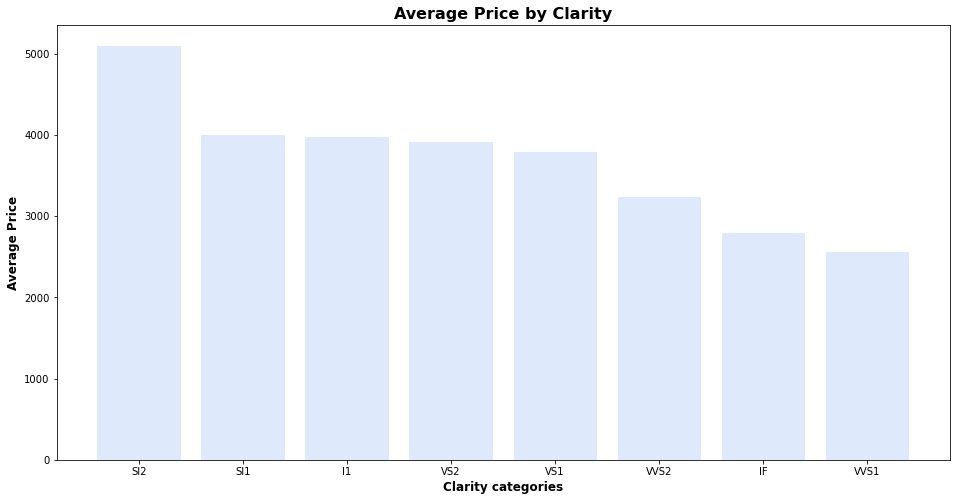

In [14]:
clarity_df = diamonds.groupby('clarity')['price'].agg('mean').reset_index().sort_values(by='price', ascending=False)
clarity_unique = clarity_df['clarity'].to_list()
avg_price_clarity = clarity_df['price'].to_list()

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(clarity_unique, avg_price_clarity, color='#deeafc', )
ax.set_title('Average Price by Clarity', fontweight='bold', fontsize=16)
ax.set_xlabel('Clarity categories',fontweight='bold', fontsize=12)
ax.set_ylabel('Average Price',fontweight='bold', fontsize=12);

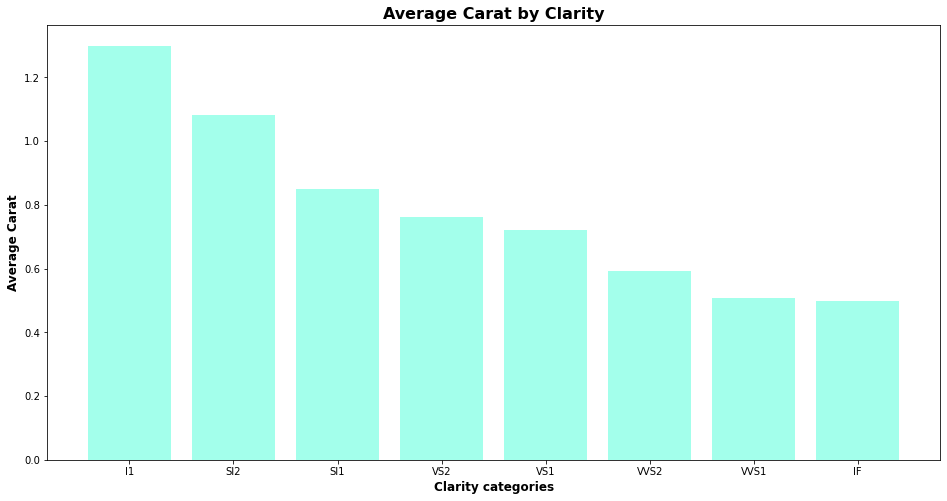

In [15]:
clarity_df = diamonds.groupby('clarity')['carat'].agg('mean').reset_index().sort_values(by='carat', ascending=False)
clarity_unique = clarity_df['clarity'].to_list()
avg_carat_clarity = clarity_df['carat'].to_list()

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(clarity_unique, avg_carat_clarity, color='#a3ffeb')
ax.set_title('Average Carat by Clarity', fontweight='bold', fontsize=16)
ax.set_xlabel('Clarity categories',fontweight='bold', fontsize=12)
ax.set_ylabel('Average Carat',fontweight='bold', fontsize=12);

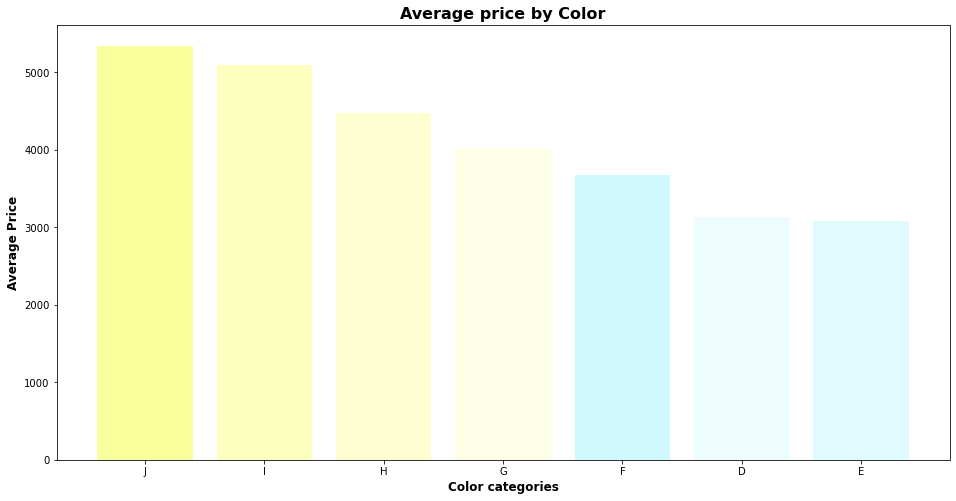

In [17]:
color_df = diamonds.groupby('color')['price'].agg('mean').reset_index().sort_values(by='price', ascending=False)
color_unique = color_df['color'].to_list()
avg_price_color = color_df['price'].to_list()

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(color_unique, avg_price_color, color=('#faff9e', '#fcffbd', '#fdffd1', '#feffe6', '#cff9ff', '#edfdff', '#e0fbff'))
ax.set_title('Average price by Color', fontweight='bold', fontsize=16)
ax.set_xlabel('Color categories', fontweight='bold', fontsize=12)
ax.set_ylabel('Average Price',fontweight='bold', fontsize=12);

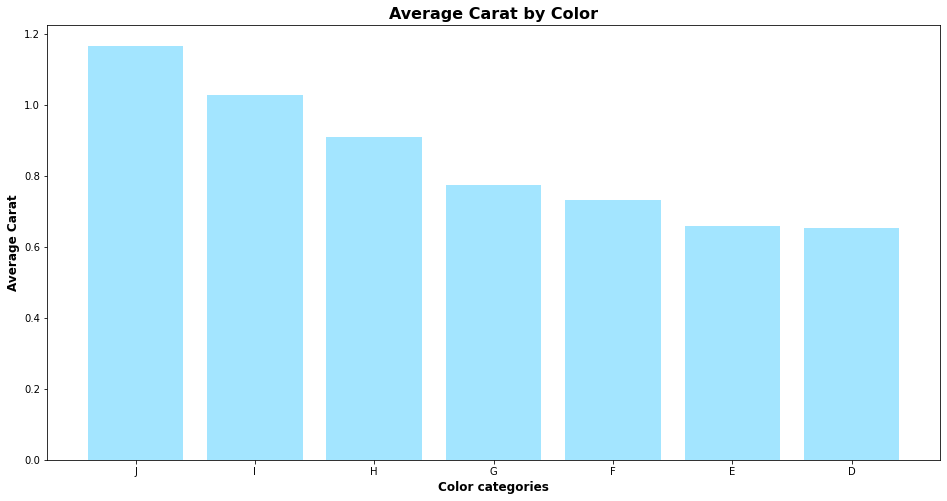

In [19]:
color_df = diamonds.groupby('color')['carat'].agg('mean').reset_index().sort_values(by='carat', ascending=False)
color_unique = color_df['color'].to_list()
avg_carat_color = color_df['carat'].to_list()

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(color_unique, avg_carat_color, color='#a3e5ff')
ax.set_title('Average Carat by Color', fontweight='bold', fontsize=16)
ax.set_xlabel('Color categories',fontweight='bold', fontsize=12)
ax.set_ylabel('Average Carat',fontweight='bold', fontsize=12);

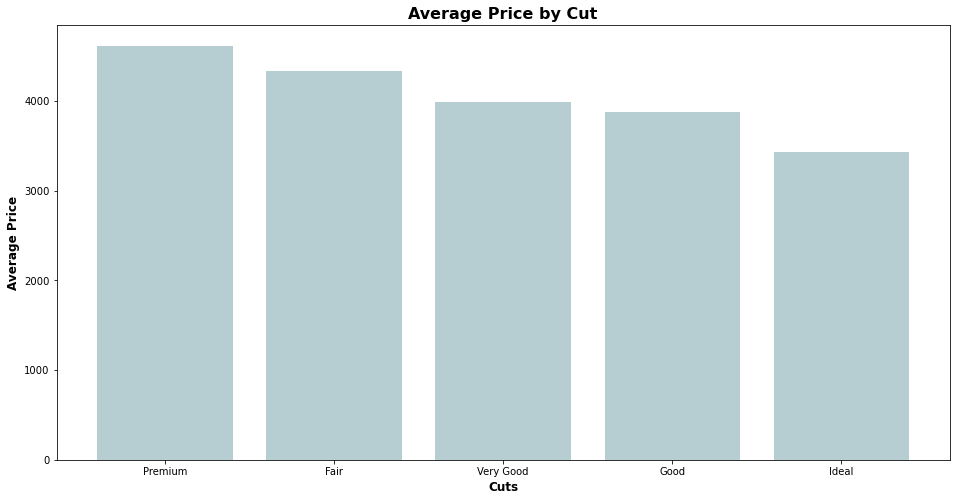

In [22]:
cut_df = diamonds.groupby('cut')['price'].agg('mean').reset_index().sort_values(by='price', ascending=False)
cut_unique = cut_df['cut'].to_list()
avg_price_cut = cut_df['price'].to_list()

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(cut_unique, avg_price_cut, color='#b6ced1')
ax.set_title('Average Price by Cut', fontweight='bold', fontsize=16)
ax.set_xlabel('Cuts', fontweight='bold', fontsize=12)
ax.set_ylabel('Average Price', fontweight='bold', fontsize=12);

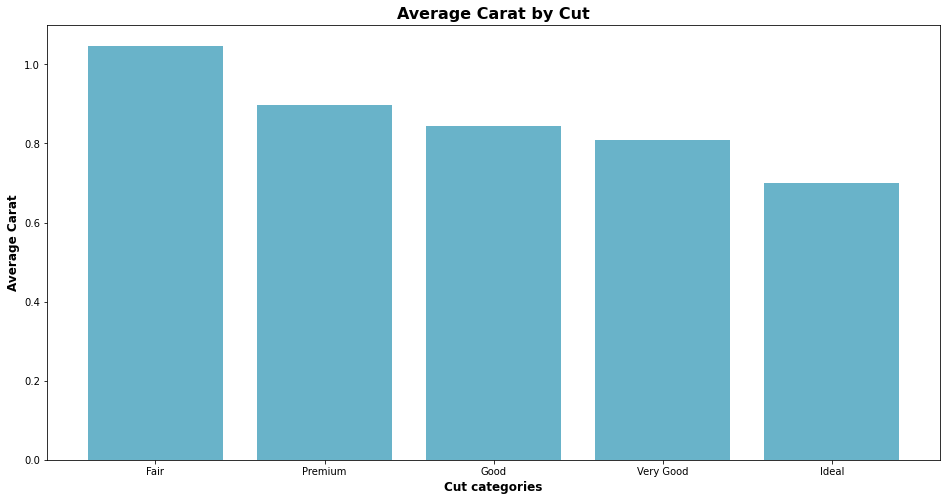

In [23]:
cut_df = diamonds.groupby('cut')['carat'].agg('mean').reset_index().sort_values(by='carat', ascending=False)
cut_unique = cut_df['cut'].to_list()
avg_carat_cut = cut_df['carat'].to_list()

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(cut_unique, avg_carat_cut, color='#69b3c9')
ax.set_title('Average Carat by Cut', fontweight='bold', fontsize=16)
ax.set_xlabel('Cut categories',fontweight='bold', fontsize=12)
ax.set_ylabel('Average Carat',fontweight='bold', fontsize=12);

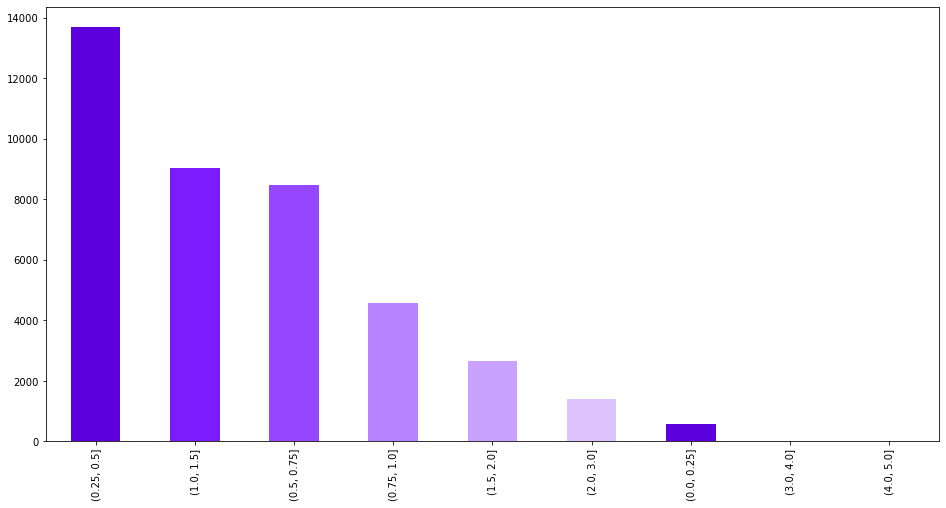

In [24]:
carat_bins = [0, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5] # most standart scales of carats found in diamonds

diamonds['carat (scale)'] = pd.cut(diamonds['carat'], bins=carat_bins)

diamonds['carat (scale)'].value_counts().plot(kind='bar', figsize=(16,8), color=('#5d00de', '#7b1cff', '#9447ff', '#b782ff', '#c9a1ff', '#ddc4ff'));

In [27]:
#depth scale:
## 59-61%: Excellent
## 58-62%: Very Good
## 56-64%: Good
## 64-70%: Fair
## Over 70%: Poor

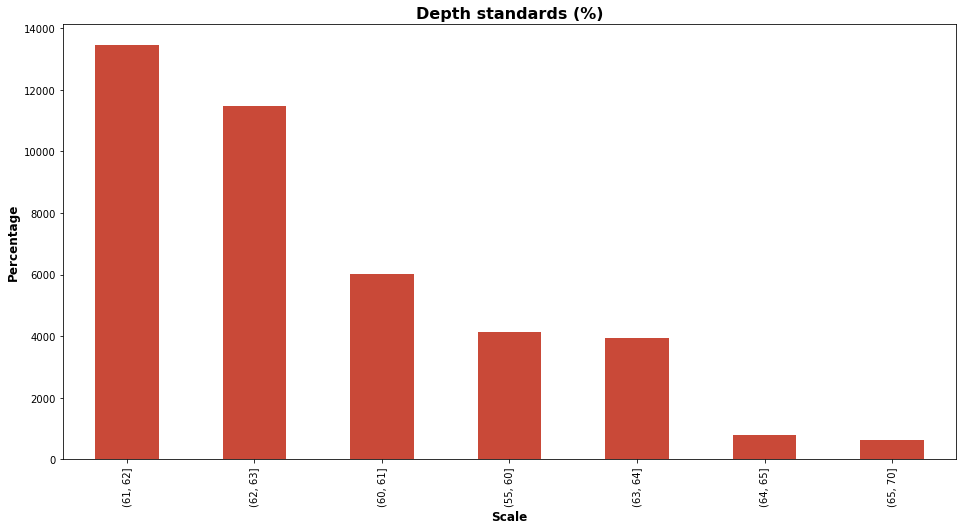

In [28]:
depth_bins = [55, 60, 61, 62, 63, 64, 65, 70]

fig, ax = plt.subplots(figsize=(16,8))

diamonds['depth (scale)'] = pd.cut(diamonds['depth'], bins=depth_bins)

diamonds['depth (scale)'].value_counts().plot(kind='bar', color='#c94938')

ax.set_title('Depth standards (%)', fontweight='bold', fontsize=16)
ax.set_xlabel('Scale',fontweight='bold', fontsize=12)
ax.set_ylabel('Percentage',fontweight='bold', fontsize=12);

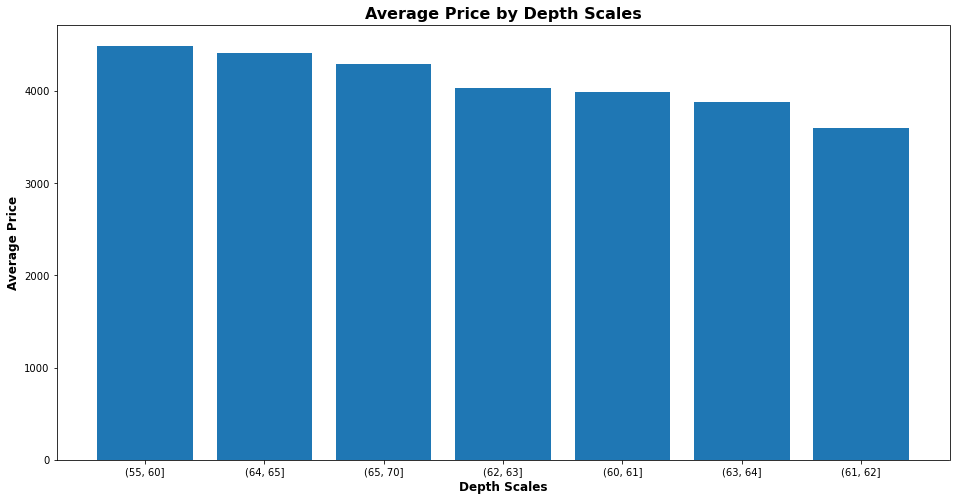

In [29]:
depth_scale_df = diamonds.groupby('depth (scale)')['price'].agg('mean').reset_index().sort_values(by='price', ascending=False)

depth_scale_df_object = depth_scale_df.astype({'depth (scale)' : 'string'})

depth_scale_unique = depth_scale_df_object['depth (scale)'].to_list()

avg_price_depth_scale = depth_scale_df_object['price'].to_list()

fig, ax = plt.subplots(figsize=(16,8))

ax.bar(depth_scale_unique, avg_price_depth_scale)
ax.set_title('Average Price by Depth Scales', fontweight='bold', fontsize=16)
ax.set_xlabel('Depth Scales',fontweight='bold', fontsize=12)
ax.set_ylabel('Average Price',fontweight='bold', fontsize=12);

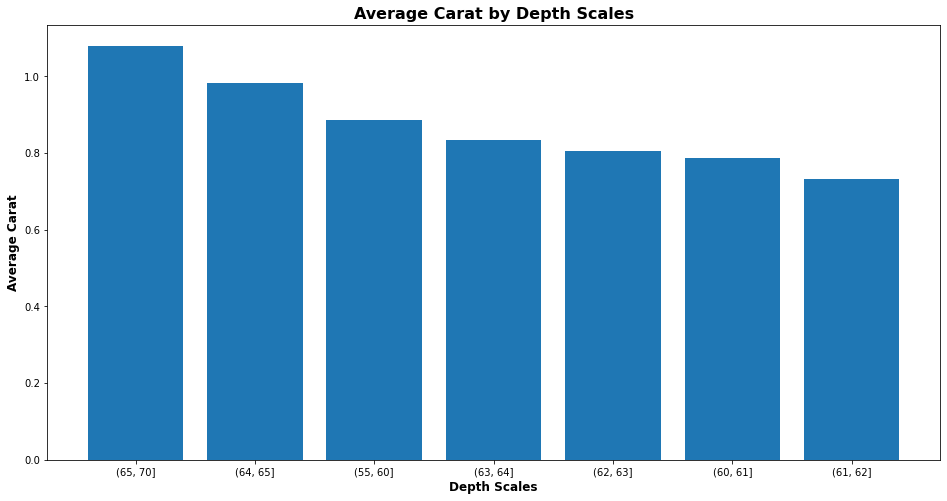

In [30]:
depth_scale_by_carat_df = diamonds.groupby('depth (scale)')['carat'].agg('mean').reset_index().sort_values(by='carat', ascending=False)

depth_scale_df = depth_scale_by_carat_df.astype({'depth (scale)' : 'string'})

depth_scale_unique = depth_scale_df['depth (scale)'].to_list()

avg_carat_depth_scale = depth_scale_df['carat'].to_list()

fig, ax = plt.subplots(figsize=(16,8))

ax.bar(depth_scale_unique, avg_carat_depth_scale)
ax.set_title('Average Carat by Depth Scales', fontweight='bold', fontsize=16)
ax.set_xlabel('Depth Scales',fontweight='bold', fontsize=12)
ax.set_ylabel('Average Carat',fontweight='bold', fontsize=12);

In [31]:
#table scale:
## 53-60%: Excellent
## 61-62%: Very good
## 62-64: Good
## 64-66: Fair
## under 53 or over 66: Poor

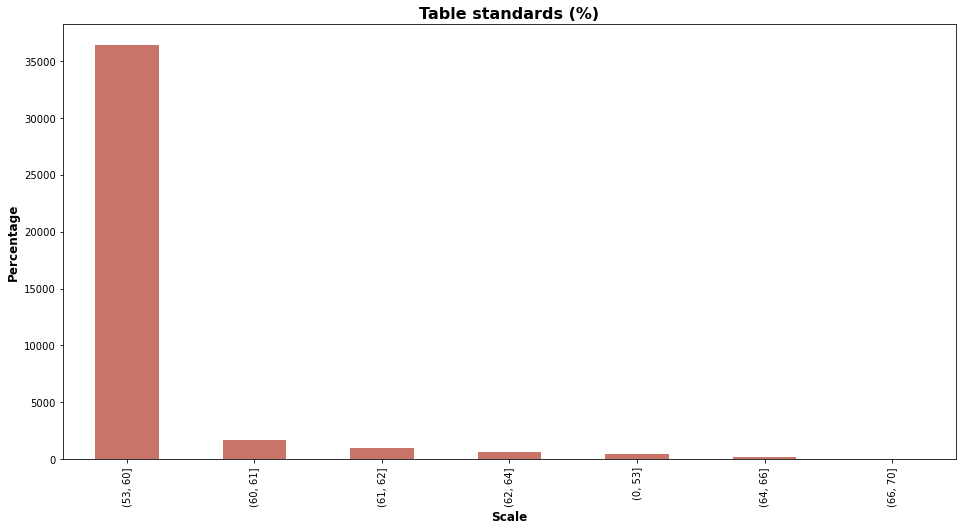

In [32]:
table_bins = [0, 53, 60, 61, 62, 64, 66, 70]

fig, ax = plt.subplots(figsize=(16,8))

diamonds['table (scale)'] = pd.cut(diamonds['table'], bins=table_bins)

diamonds['table (scale)'].value_counts().plot(kind='bar', color = '#c97469');

ax.set_title('Table standards (%)', fontweight='bold', fontsize=16)
ax.set_xlabel('Scale',fontweight='bold', fontsize=12)
ax.set_ylabel('Percentage',fontweight='bold', fontsize=12);

In [33]:
diamonds.to_csv('data/diamonds.csv', index=False, sep=',')

In [34]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   carat          40455 non-null  float64 
 1   cut            40455 non-null  object  
 2   color          40455 non-null  object  
 3   clarity        40455 non-null  object  
 4   depth          40455 non-null  float64 
 5   table          40455 non-null  float64 
 6   price          40455 non-null  int64   
 7   x              40455 non-null  float64 
 8   y              40455 non-null  float64 
 9   z              40455 non-null  float64 
 10  carat (scale)  40455 non-null  category
 11  depth (scale)  40419 non-null  category
 12  table (scale)  40449 non-null  category
dtypes: category(3), float64(6), int64(1), object(3)
memory usage: 3.2+ MB
